<a href="https://colab.research.google.com/github/svgoudar/data_science_tutorial/blob/main/ML/18.Heirarichal_clustering/Hierarichal_Clustering_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
## Import IRIS dataset
iris=datasets.load_iris()

In [ ]:
iris_data=pd.DataFrame(iris.data)

In [ ]:
iris_data.columns=iris.feature_names

In [ ]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_scaled=scaler.fit_transform(iris_data)


In [ ]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
## Apply the PCA
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca_scaled=pca.fit_transform(X_scaled)

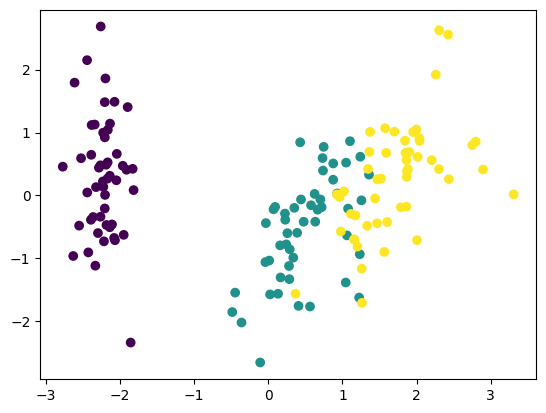

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

Text(0, 0.5, 'Eucledian Distance')

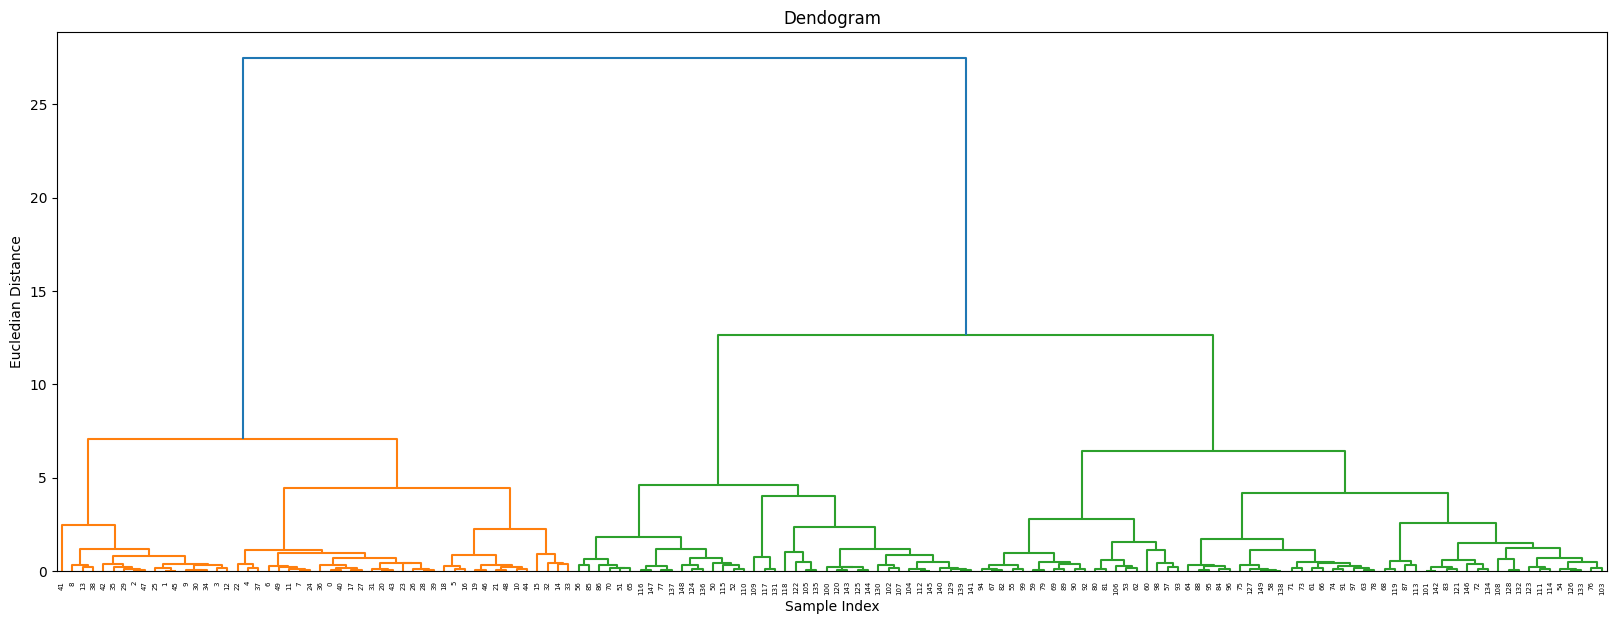

In [ ]:
## Agglomerative Clustering
## To construct a dendogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

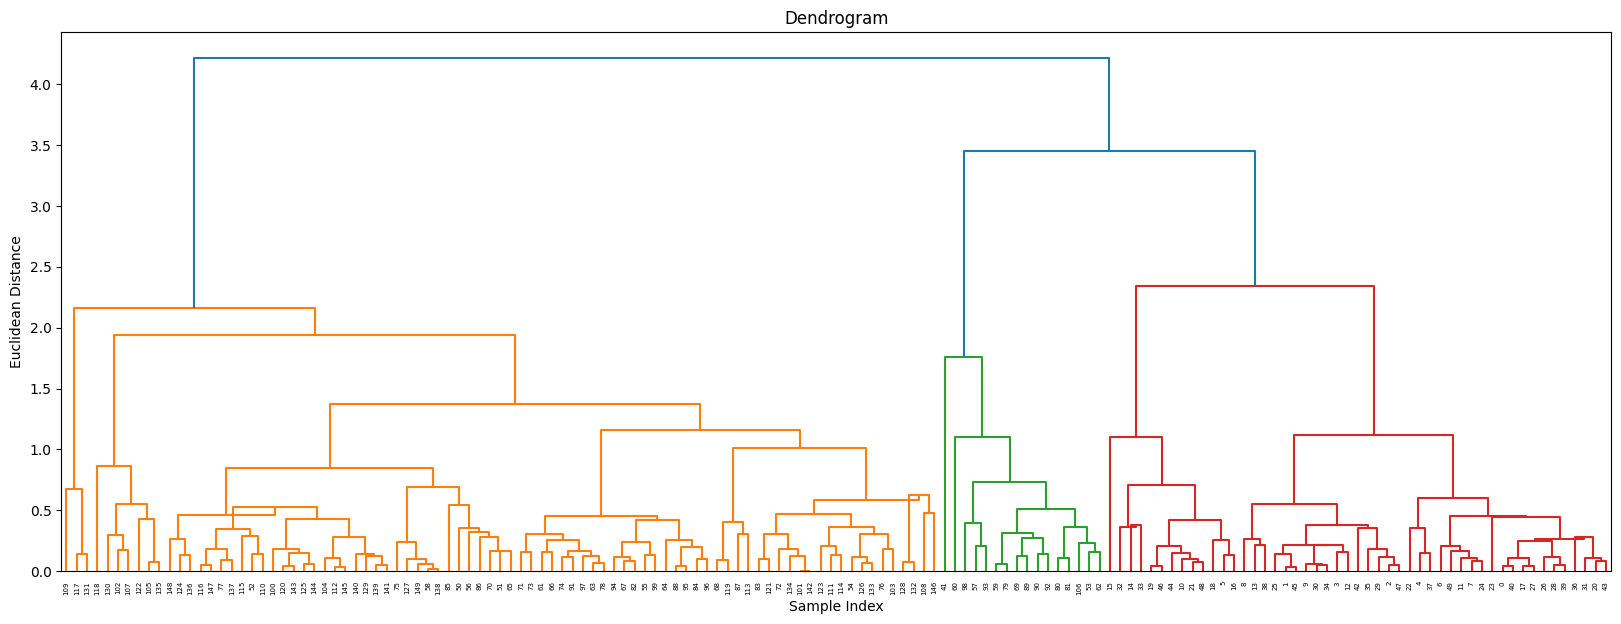

In [ ]:
# prompt: for dendogram

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)

# Apply PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_scaled)

# Plot the dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrogram")
dendrogram = sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [ ]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

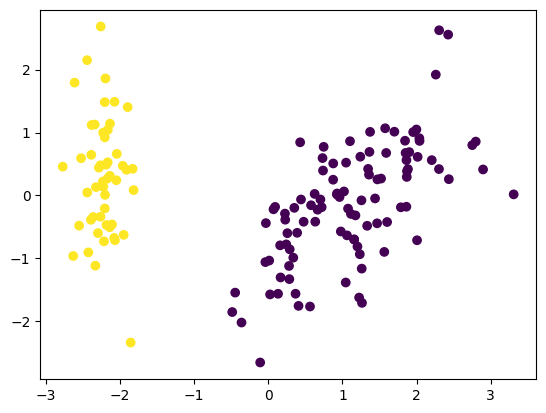

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [ ]:
## silhouette score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

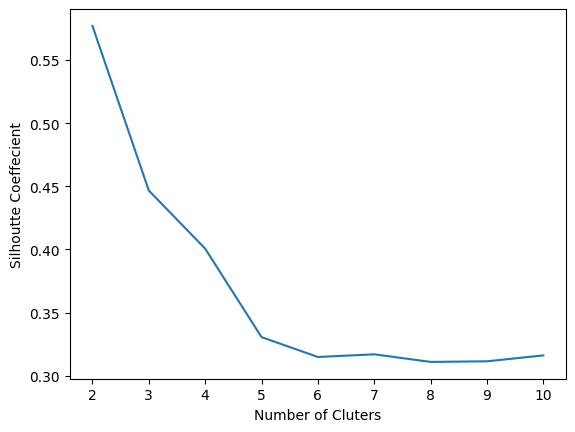

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

## Hierarichal Clustering for Categorical Data

Encoded Data:
    Likes Apple  Likes Banana  Likes Orange
0            1             0             1
1            1             1             0
2            0             1             1
3            1             1             1

Pairwise Hamming Distance Matrix:
 [[0.         0.66666667 0.66666667 0.33333333]
 [0.66666667 0.         0.66666667 0.33333333]
 [0.66666667 0.66666667 0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 0.        ]]


<ipython-input-25-8333d9fc7c29>:30: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='average')


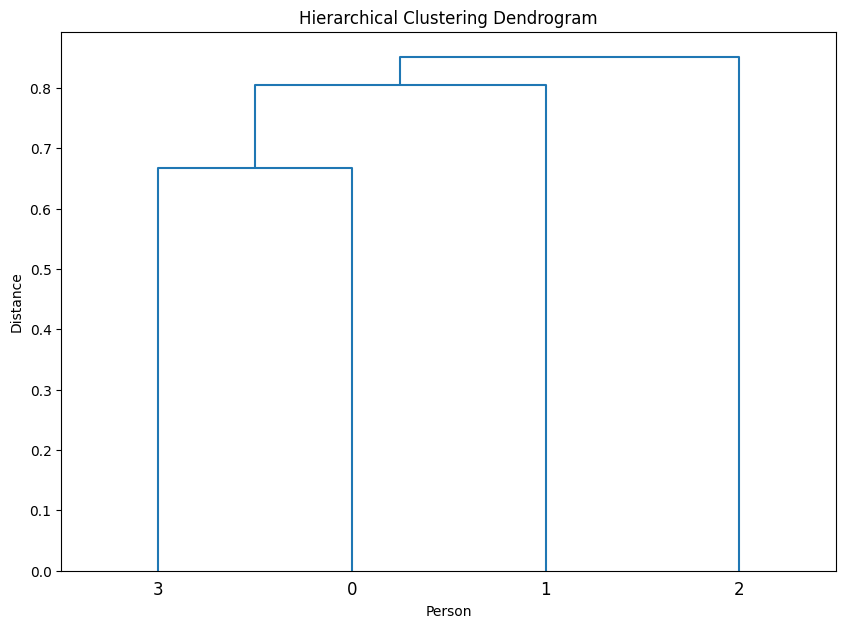

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Sample non-numeric (binary) categorical data
data = {
    'Likes Apple': ['Yes', 'Yes', 'No', 'Yes'],
    'Likes Banana': ['No', 'Yes', 'Yes', 'Yes'],
    'Likes Orange': ['Yes', 'No', 'Yes', 'Yes']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical data (Yes/No -> 1/0)
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Print the encoded data
print("Encoded Data:\n", df_encoded)

# Compute pairwise distances using Hamming distance (since it's binary data)
distance_matrix = pairwise_distances(df_encoded, metric='hamming')
print("\nPairwise Hamming Distance Matrix:\n", distance_matrix)

# Perform hierarchical clustering using the linkage method (Ward linkage by default)
linked = linkage(distance_matrix, method='average')

# Create a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df.index.tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Person")
plt.ylabel("Distance")
plt.show()
